# Softmax regression

In [1]:
import numpy as np
from pprint import pprint

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import log_loss, ConfusionMatrixDisplay, classification_report, make_scorer, f1_score

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('figure', figsize=(8, 6))

import warnings
warnings.filterwarnings('ignore')

In [2]:
np.random.seed(42)

In [3]:
from sklearn.datasets import fetch_openml
X_pd, y_pd = fetch_openml('mnist_784', version=1, return_X_y=True)

In [4]:
X = X_pd.to_numpy()
y = y_pd.to_numpy()

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

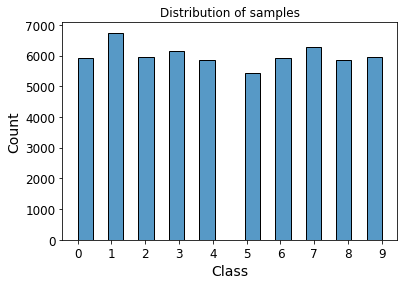

In [6]:
plt.figure()
sns.histplot(data=np.int8(y_train), binwidth=0.45, bins=11)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9], labels=[0,1,2,3,4,5,6,7,8,9])
plt.xlabel('Class')
plt.title('Distribution of samples')
plt.show()

## Building the model

In [7]:
pipe = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression(multi_class='multinomial', solver='sag'))])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(multi_class='multinomial', solver='sag'))])

In [8]:
pipe[-1].coef_.shape

(10, 784)

In [9]:
pipe[-1].intercept_.shape

(10,)

In [10]:
pipe[-1].classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

## Model evaluation

In [11]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.94      0.90      0.92      1032
           3       0.91      0.91      0.91      1010
           4       0.92      0.94      0.93       982
           5       0.91      0.87      0.89       892
           6       0.93      0.95      0.94       958
           7       0.92      0.93      0.92      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



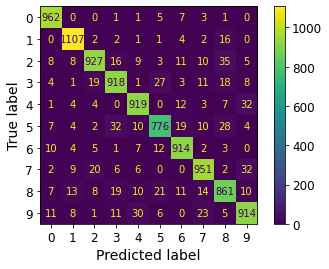

In [12]:
ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test)

Following is an attempt to cross-validate the same regression model, but it takes more than 3 hours to finish.  For now, just commenting out the lines.

In [13]:
# scorer = make_scorer(f1_score, average='micro')
# pipe = Pipeline([('scaler', StandardScaler()), ('logreg', 
#                                                 LogisticRegressionCV(cv=5, multi_class='multinomial', solver='sag', 
#                                                                      scoring=scorer, max_iter=100, random_state=1729))])
# pipe.fit(X_train, y_train)

Checking the best hyperparameters that resulted from the cross-validation

In [14]:
# pipe[-1].C_

In [15]:
# pipe[-1].l1_ratio_

In [16]:
# print(classification_report(y_test, pipe.predict(X_test)))

In [17]:
# ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test)

# KNN for hand-written digits recognition

In [18]:
import numpy as np
from pprint import pprint

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, RandomizedSearchCV, GridSearchCV, cross_val_predict, learning_curve
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('figure', figsize=(8, 6))

import warnings
warnings.filterwarnings('ignore')


In [19]:
np.random.seed(42)

In [20]:
from sklearn.datasets import fetch_openml
X_pd, y_pd = fetch_openml('mnist_784', version=1, return_X_y=True)

In [21]:
X = X_pd.to_numpy()
y = y_pd.to_numpy()

In [22]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [23]:
#initialize new variable names with all -1
y_train_0 = -1 * np.ones(y_train.shape[0])
y_test_0 = -1 * np.ones(y_test.shape[0])

#find indices of digit 0 image
indx_0 = np.where(y_train == '0')
y_train_0[indx_0] = 1
indx_0 = np.where(y_test == '0')
y_test_0[indx_0] = 1

print(y_train)
print(y_train_0)

['5' '0' '4' ... '5' '6' '8']
[-1.  1. -1. ... -1. -1. -1.]


## Using PCA to reduce dimensions

#### to two features

In [24]:
pipe_pca_2d = make_pipeline(MinMaxScaler(), PCA(n_components=2))
X_train_pca_2d = pipe_pca_2d.fit_transform(X_train)

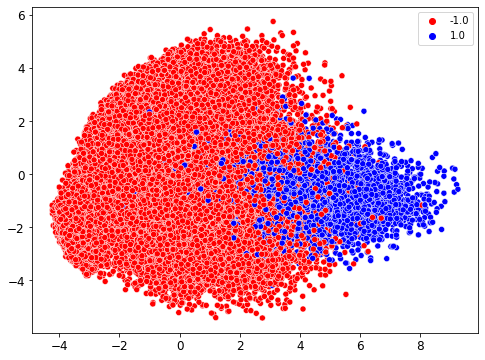

In [25]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['r', 'b'])
sns.scatterplot(x = X_train_pca_2d[:, 0], y = X_train_pca_2d[:, 1], hue=y_train_0, palette=cmap)

#### to three features

In [26]:
pipe_pca_3d = make_pipeline(MinMaxScaler(), PCA(n_components=3))
X_train_pca_3d = pipe_pca_3d.fit_transform(X_train)

In [27]:
# Commenting out, since this could impact the rendering of the notebook.

# from matplotlib.colors import ListedColormap
# import plotly.express as px
# cmap = ListedColormap(['r', 'b'])
# px.scatter_3d(x = X_train_pca_3d[:, 0], y = X_train_pca_3d[:, 1], z = X_train_pca_3d[:, 2], 
#               color=y_train_0, color_discrete_map=cmap, opacity=0.5)

## Train KNN classifier

In [28]:
pipe_clf_pca_2d = make_pipeline(pipe_pca_2d, KNeighborsClassifier(n_neighbors=3))

In [29]:
# Train 10 samples (first 5 from negative class and last 5 from positive class)
index_neg = np.argsort(y_train_0)[:5]
index_pos = np.argsort(y_train_0)[-1:-6:-1]
print(f"Positive classes: {y_train_0[index_pos]}")
print(f"Negative classes: {y_train_0[index_neg]}")

Positive classes: [1. 1. 1. 1. 1.]
Negative classes: [-1. -1. -1. -1. -1.]


In [30]:
# Create a small dataset
X = np.vstack((X_train[index_pos, :], X_train[index_neg, :]))
y = np.hstack((y_train_0[index_pos], y_train_0[index_neg]))
print(X.shape, y.shape)

(10, 784) (10,)


In [31]:
pipe_clf_pca_2d.fit(X, y)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                 ('pca', PCA(n_components=2))])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

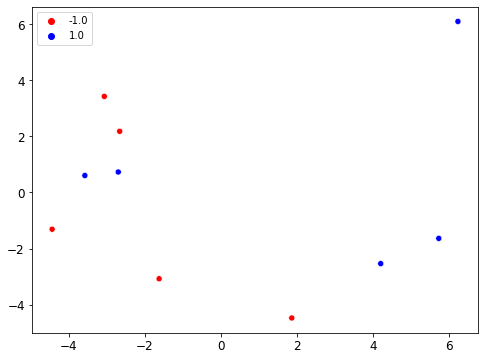

In [32]:
# Plot them X (after applying PCA) with corresponding y.
X_reduced = pipe_clf_pca_2d[0].transform(X)

cmap = ListedColormap(['r', 'b'])
sns.scatterplot(X_reduced[:, 0], y=X_reduced[:, 1], marker='o', hue=y, palette=cmap)

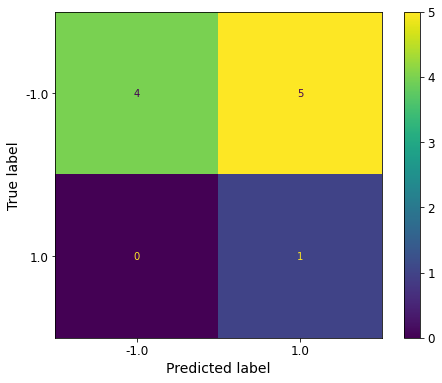

In [33]:
# Predict from the model
y_hat_0 = pipe_clf_pca_2d.predict(X_test[:10, :])
ConfusionMatrixDisplay.from_predictions(y_test_0[:10], y_hat_0)

## Without PCA

In [34]:
pipe_knn = make_pipeline(MinMaxScaler(), KNeighborsClassifier(n_neighbors=1))

grid_k = {'kneighborsclassifier__n_neighbors': [1,3,5,7,9,11]}
cv = GridSearchCV(pipe_knn, param_grid=grid_k, scoring='precision', cv=5)
cv.fit(X_train, y_train_0)
print(cv)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier(n_neighbors=1))]),
             param_grid={'kneighborsclassifier__n_neighbors': [1, 3, 5, 7, 9,
                                                               11]},
             scoring='precision')


In [35]:
cv.cv_results_

{'mean_fit_time': array([0.52450976, 0.52217765, 0.52737203, 0.51757469, 0.61411963,
        0.51686378]),
 'mean_score_time': array([34.04600744, 35.32315903, 39.53948145, 39.15179048, 39.19789629,
        39.05099483]),
 'mean_test_score': array([0.97805545, 0.98229094, 0.98212333, 0.98245498, 0.98111657,
        0.98078408]),
 'param_kneighborsclassifier__n_neighbors': masked_array(data=[1, 3, 5, 7, 9, 11],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'kneighborsclassifier__n_neighbors': 1},
  {'kneighborsclassifier__n_neighbors': 3},
  {'kneighborsclassifier__n_neighbors': 5},
  {'kneighborsclassifier__n_neighbors': 7},
  {'kneighborsclassifier__n_neighbors': 9},
  {'kneighborsclassifier__n_neighbors': 11}],
 'rank_test_score': array([6, 2, 3, 1, 4, 5], dtype=int32),
 'split0_test_score': array([0.97920133, 0.98493724, 0.98166667, 0.98086522, 0.97921862,
        0.97921862]),
 'split1_test_score': ar

In [36]:
cv.best_params_

{'kneighborsclassifier__n_neighbors': 7}

In [37]:
pipe_knn = make_pipeline(MinMaxScaler(), KNeighborsClassifier(n_neighbors=7))
pipe_knn.fit(X_train, y_train_0)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=7))])

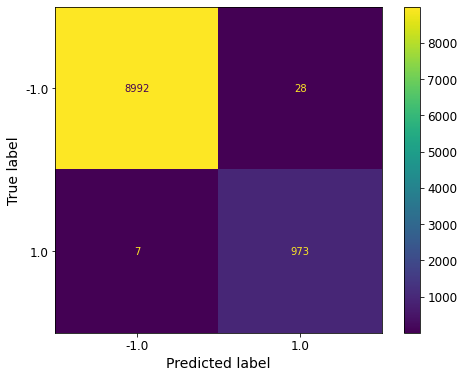

In [38]:
y_hat_0 = pipe_knn.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test_0, y_hat_0)

# Multiclass classifier

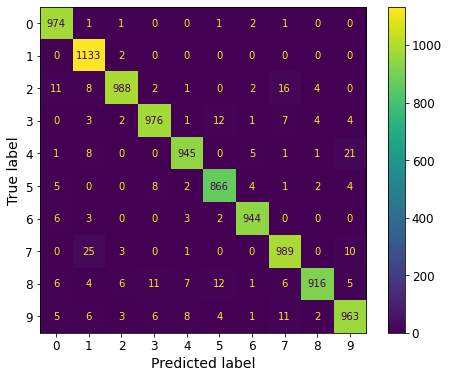

In [39]:
pipe_knn.fit(X_train, y_train)  #reuse the pipe created earlier
y_hat = pipe_knn.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_hat)

In [40]:
pipe_knn.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [41]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.95      1.00      0.97      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



# Regression using KNN: California Housing

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [43]:
X, y = fetch_california_housing(return_X_y=True)
print(X.shape, y.shape)

(20640, 8) (20640,)


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)
print(X_train.shape, X_test.shape)

(14448, 8) (6192, 8)


## Model building

Ensure that before the KNN model is fit, it's always scaled; else it won't work as expected

In [45]:
pipe = Pipeline([('scaler', MinMaxScaler()), ('knn', KNeighborsRegressor(n_neighbors=2))])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
error = mean_squared_error(y_test, y_pred, squared=False)
print(error)

0.6767822465759739


## Model selection and evaluation

In [46]:
pipe = Pipeline([('scaler', MinMaxScaler()), ('knn', KNeighborsRegressor(n_neighbors=2))])
gs = GridSearchCV(pipe, param_grid={'knn__n_neighbors': list(range(1, 31))}, cv=10, n_jobs=1, return_train_score=True)
gs.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn',
                                        KNeighborsRegressor(n_neighbors=2))]),
             n_jobs=1,
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30]},
             return_train_score=True)

In [47]:
gs.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('knn', KNeighborsRegressor(n_neighbors=6))])

In [48]:
# Now, use this estimator to predict.
pred = gs.best_estimator_.predict(X_test)
error = mean_squared_error(y_test, pred, squared=False)
print("RMSE value for k is: ", error)

RMSE value for k is:  0.6255268557053962


# Pre-processing text documents

HashingVectorizer is the way to go if we're falling short of memory and resources, or we need to perform incremental learning; CountVectorizer is best choice if we need access to the actual tokens

- Using CountVectorizer

In [49]:
text = ['One way to get a sense of the daring of this personal statement, written by a student who aims to study film at Columbia University, is simply to consider the allusions he makes throughout his statement. With neither apology nor obvious humility, this writer makes references to Steven Spielberg, Woody Allen, Jean-Luc Godard, Jean Vigo, Terrence Malick, and David Gordon Green. Further, this writer takes the unusual step of using section headings in his personal statement, including, on his first page “Poetry,” “Plastics,” and “Children.” But no matter how creative this writer is, of course, we must ultimately judge him on his evidenced ability as a filmmaker. In that regard, he showcases his ease with talking about films and directors, posits an analogy about student filmmaking (“directing your own material is like parenting”), and discusses the success of his nineteen-minute senior project, “Burying Dvorak”—a film he promoted by taking a year off after graduation, successfully landing it in more than 20 film festivals. As he closes his essay, he makes a specific pitch for Columbia University, where he hopes to continue “to discover my own voice, my own poetry.”',
        'For the lengthy sample essay from the student in biological science, the extensive length and scientific depth are necessary because the student is applying for the highly competitive STAR Fellowship. The STAR (Science to Achieve Results) program offers graduate fellowships through the US Environmental Protection Agency (EPA), funding several years of study. Given the competitiveness of the process and the EPA’s mission of environmental protection, it is vital that this student presents a viable, environmentally important project in a persuasive, professional manner. To achieve this, the writer successfully approaches the essay as she would a thesis proposal, using science-related section heads, providing original figures and data, focusing heavily on future research goals, and essentially performing a literature review, citing 19 sources ranging from basic textbooks to refereed journals. The result is a powerful essay with scientific depth.',
        'In the first sample essay from mechanical engineering, what stands out immediately are the length and the photographs. In this case, the student was applying for an engineering scholarship, so he was given room to flesh out technical material as well as address issues such as personal motivations one would expect to read in a personal statement. Much of the essay is given to a discussion of his thesis work, which involves the examination of “the propagation of a flame in a small glass tube.” The figures depict the experimental work and represent the success of preliminary thesis results, visually indicating the likely point at which the flame reached detonation.']

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
c_vectorizer = CountVectorizer()
X_c = c_vectorizer.fit_transform(text)
X_c.shape

(3, 247)

In [51]:
c_vectorizer.vocabulary_ # each of these represent the features in the dataset

{'19': 0,
 '20': 1,
 'ability': 2,
 'about': 3,
 'achieve': 4,
 'address': 5,
 'after': 6,
 'agency': 7,
 'aims': 8,
 'allen': 9,
 'allusions': 10,
 'an': 11,
 'analogy': 12,
 'and': 13,
 'apology': 14,
 'applying': 15,
 'approaches': 16,
 'are': 17,
 'as': 18,
 'at': 19,
 'basic': 20,
 'because': 21,
 'biological': 22,
 'burying': 23,
 'but': 24,
 'by': 25,
 'case': 26,
 'children': 27,
 'citing': 28,
 'closes': 29,
 'columbia': 30,
 'competitive': 31,
 'competitiveness': 32,
 'consider': 33,
 'continue': 34,
 'course': 35,
 'creative': 36,
 'daring': 37,
 'data': 38,
 'david': 39,
 'depict': 40,
 'depth': 41,
 'detonation': 42,
 'directing': 43,
 'directors': 44,
 'discover': 45,
 'discusses': 46,
 'discussion': 47,
 'dvorak': 48,
 'ease': 49,
 'engineering': 50,
 'environmental': 51,
 'environmentally': 52,
 'epa': 53,
 'essay': 54,
 'essentially': 55,
 'evidenced': 56,
 'examination': 57,
 'expect': 58,
 'experimental': 59,
 'extensive': 60,
 'fellowship': 61,
 'fellowships': 62,
 

In [52]:
print(X_c) # returns a sparse matrix

  (0, 139)	1
  (0, 231)	1
  (0, 218)	6
  (0, 78)	1
  (0, 185)	1
  (0, 135)	5
  (0, 213)	4
  (0, 37)	1
  (0, 215)	4
  (0, 146)	2
  (0, 197)	3
  (0, 243)	1
  (0, 25)	2
  (0, 200)	2
  (0, 237)	1
  (0, 8)	1
  (0, 201)	1
  (0, 65)	3
  (0, 19)	1
  (0, 30)	2
  (0, 221)	2
  (0, 103)	3
  (0, 189)	1
  (0, 33)	1
  (0, 10)	1
  :	:
  (2, 204)	1
  (2, 125)	1
  (2, 58)	1
  (2, 168)	1
  (2, 126)	1
  (2, 47)	1
  (2, 240)	2
  (2, 236)	2
  (2, 102)	1
  (2, 57)	1
  (2, 162)	1
  (2, 70)	2
  (2, 190)	1
  (2, 80)	1
  (2, 219)	1
  (2, 40)	1
  (2, 59)	1
  (2, 173)	1
  (2, 155)	1
  (2, 227)	1
  (2, 101)	1
  (2, 113)	1
  (2, 152)	1
  (2, 167)	1
  (2, 42)	1


- Using HashVectorizer

In [53]:
from sklearn.feature_extraction.text import HashingVectorizer
h_vectorizer = HashingVectorizer(n_features=50)
# n_features need to be keep optimum, so that the words are well represented, but without too much legroom
X_h = h_vectorizer.fit_transform(text)
X_h.shape

(3, 50)

In [54]:
print(X_h[0])

  (0, 1)	-0.04789131426105757
  (0, 2)	-0.09578262852211514
  (0, 3)	0.09578262852211514
  (0, 4)	0.23945657130528783
  (0, 5)	-0.04789131426105757
  (0, 6)	0.04789131426105757
  (0, 7)	0.04789131426105757
  (0, 8)	-0.04789131426105757
  (0, 9)	0.04789131426105757
  (0, 10)	0.04789131426105757
  (0, 11)	-0.23945657130528783
  (0, 12)	0.04789131426105757
  (0, 13)	0.0
  (0, 14)	-0.09578262852211514
  (0, 15)	0.04789131426105757
  (0, 16)	-0.04789131426105757
  (0, 17)	-0.23945657130528783
  (0, 18)	0.0
  (0, 19)	0.04789131426105757
  (0, 20)	-0.09578262852211514
  (0, 21)	0.09578262852211514
  (0, 22)	-0.19156525704423027
  (0, 23)	-0.04789131426105757
  (0, 24)	0.23945657130528783
  (0, 25)	0.0
  (0, 26)	0.04789131426105757
  (0, 27)	0.04789131426105757
  (0, 28)	0.04789131426105757
  (0, 29)	0.0
  (0, 30)	0.0
  (0, 31)	-0.04789131426105757
  (0, 32)	0.1436739427831727
  (0, 33)	0.0
  (0, 34)	0.09578262852211514
  (0, 35)	0.04789131426105757
  (0, 36)	0.0
  (0, 37)	0.04789131426105757


# Classifying text documents

### HashingVectorizer with SGDClassifier

In [55]:
import numpy as np
import pandas as pd
from io import StringIO, BytesIO, TextIOWrapper
from zipfile import ZipFile
import urllib.request

resp = urllib.request.urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip')
zipfile = ZipFile(BytesIO(resp.read()))

data = TextIOWrapper(zipfile.open('sentiment labelled sentences/amazon_cells_labelled.txt'), encoding='utf-8')

df = pd.read_csv(data, sep='\t')
df.columns = ['review', 'sentiment']

In [56]:
df.head()

,review,sentiment
0,"Good case, Excellent value.",1
1,Great for the jawbone.,1
2,Tied to charger for conversations lasting more...,0
3,The mic is great.,1
4,I have to jiggle the plug to get it to line up...,0


In [57]:
df.tail()

,review,sentiment
994,The screen does get smudged easily because it ...,0
995,What a piece of junk.. I lose more calls on th...,0
996,Item Does Not Match Picture.,0
997,The only thing that disappoint me is the infra...,0
998,"You can not answer calls with the unit, never ...",0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     999 non-null    object
 1   sentiment  999 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [59]:
df.loc[:, 'sentiment'].unique()

array([1, 0])

In [60]:
from sklearn.model_selection import train_test_split

X = df['review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, y_train.shape

((799,), (799,))

In [61]:
from sklearn.feature_extraction.text import HashingVectorizer
h_vectorizer = HashingVectorizer()

In [62]:
from sklearn.linear_model import SGDClassifier
classifier = SGDClassifier(penalty='l2', loss='hinge')

Now, let's do the learning in parts using partial_fit; split the dataset equally

On Iteration-1:

In [63]:
X_train_part1_hashed = h_vectorizer.fit_transform(X_train[0:400])
y_train_part1 = y_train[0:400]

In [64]:
all_classes = np.unique(df['sentiment'])
print(all_classes)

[0 1]


In [65]:
classifier.partial_fit(X_train_part1_hashed, y_train_part1, classes=all_classes)

SGDClassifier()

In [66]:
# Use the trained classifier on test data
X_test_hashed = h_vectorizer.transform(X_test) #because h_vectorizer was already fit with X_train[0:400] above
test_score = classifier.score(X_test_hashed, y_test)
print(test_score)

0.765


On Iteration-2:

In [67]:
X_train_part2_hashed = h_vectorizer.fit_transform(X_train[400:])
y_train_part2 = y_train[400:]

In [68]:
classifier.partial_fit(X_train_part2_hashed, y_train_part2)

SGDClassifier()

In [69]:
# Use the trained classifier on test data
X_test_hashed = h_vectorizer.transform(X_test) #because h_vectorizer was already fit with X_train[0:400] above
test_score = classifier.score(X_test_hashed, y_test)
print(test_score)

0.735


Note that in two partial fit iterations, the test score has increased.